In [1]:
#pip install pytesseract

In [1]:
import pytesseract

In [2]:
import cv2

In [3]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [4]:
img=cv2.imread(r'C:\Users\owner\OneDrive\Documents\Machine vision\Capture.png')

<IPython.core.display.Javascript object>

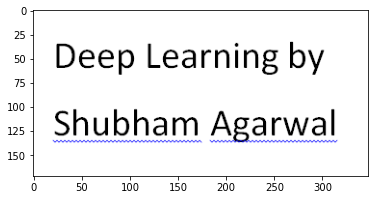

In [5]:
plt.imshow(img)

In [6]:
img2char=pytesseract.image_to_string(img)

In [7]:
print(img2char)

Deep Learning by
Shubham Agarwal



In [8]:
imgbox=pytesseract.image_to_boxes(img)

In [9]:
type(imgbox)

str

In [10]:
print(imgbox)

D 25 112 43 137 0
e 48 112 64 131 0
e 68 112 84 131 0
p 89 105 105 131 0
L 120 112 132 137 0
e 135 112 151 131 0
a 155 112 169 131 0
r 175 112 185 131 0
n 189 112 204 131 0
i 210 112 213 138 0
n 219 112 234 131 0
g 238 105 254 131 0
b 267 112 283 139 0
y 286 105 302 130 0
S 17 24 42 73 0
h 41 24 62 73 0
u 61 24 83 73 0
b 21 35 160 69 0
h 102 24 124 73 0
a 123 24 144 73 0
m 143 24 160 73 0
A 185 42 206 67 0
g 208 35 224 61 0
a 228 42 242 61 0
r 237 24 254 73 0
w 248 42 286 61 0
a 274 24 291 73 0
l 290 42 313 69 0



In [11]:
imgH, imgW,_=img.shape

In [12]:
img.shape

(172, 348, 3)

In [13]:
for boxes in imgbox.splitlines():
    boxes=boxes.split(' ')
    x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img, (x, imgH-y), (w, imgH-h), (0,255,0),3)

<IPython.core.display.Javascript object>

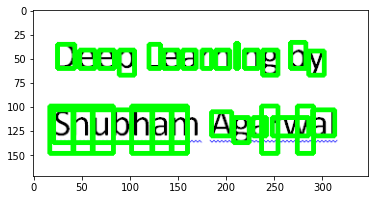

In [14]:
plt.imshow(img) ## by default cv2 ==> blue color

In [16]:
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
font_scale=1.5
fotn= cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture(r'C:\Users\owner\AppData\LocalLow\iTop Screen Recorder\Outputs\20221123_114718.mp4')
# cap=cv2.VideoCapture(1)    for opening web cam

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
cntr=0;
while True:
    ret, frame=cap.read()
    cntr=cntr+1;
    if((cntr%20)==0):
        
        imgH, imgW,_=frame.shape
        x1,y1,w1,h1=0,0,imgH,imgW
        imgchar=pytesseract.image_to_string(frame)
        imgboxes=pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes=boxes.split(' ')
            x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
            cv2.rectangle(frame, (x, imgH-y), (w, imgH-h),(0,0,255),3)
        
        #add text
        cv2.putText(frame, imgchar, (x1+int(w1/50), y1+int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0),2)
        
        font=cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.imshow('Text Detection Tutorial', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()